In [159]:
import numpy as np

def funcion(x):
    return x**2-3*x-1
def funcion2(x):
    return x**2+4*x-6
def funcion3(x):
    return x**3+ 2*x**2 +10*x -20
def derivada_f2(x):
    return 2*x+4
def funcion4(x):
    return 0.5 + -(x + np.sin(x)) * np.exp(-x**2.0)
def x_sin_exp(x):
    return 0.5 -(x + np.sin(x)) * np.exp(-x**2.0) 
def derivada_exp(x):
    return (-1+np.cos(x))*np.exp(-x**2.0) - 2*x * np.exp(-x**2.0) * ( x+np.sin(x))
    
    

def root_bracket(f: callable, a: float, b: float, delta=1.)-> tuple:
    '''
    Summary: 
    Mediante un paso delta vamos avanzando en el intervalo desde a hasta b, comprobando en cada iteración que f(a) y f(x) tienen
    el mismo signo. Cuando esta condición no se cumpla, por el teorema de Bolzano, si tenemos un intervalo (a,x) en una función
    continua donde f(a) y f(x) tienen distinto signo, entonces en dicho intervalo tenemos un raíz. Será en este momento cuando 
    devolvamos el intervalo (a,x). En caso de que x se haya salido del intervalo y no se haya dado dicha condición, devolveremos
    (-np.inf,np.inf).
    
    Args: 
    f:función en la que se define nuestro intervalo
    a: ordenada x donde empieza nuestro intervalo
    b: ordenada x donde finaliza nuestro intervalo, debe ser mayor que a
    delta: paso que definimos para avanzar en la búsqueda de la raíz, debe ser mayor que 0
    f debe ser de tipo callable y el resto int o float'''
    if a > b:
        raise Exception('a debe de ser menor que b')
    if delta<=0:
        raise Exception('delta debe ser un numero positivo')
    x = a + delta
    f_a = f(a)

    while f_a*f(x)>0:
        
        if x > b:
            return (-np.inf,np.inf)
        x += delta
    return (a,x)

print(root_bracket(funcion,2,4,0.1))

def bisection(f: callable, a: float, b: float, tol=0.001, maxiter=100)-> tuple[float, int]:
    '''Args: En primer lugar comprobamos con root_bracket que nuestro intervalo tiene al menos una raíz.
    Si es así entraremos en un bucle donde cogeremos el punto medio (m) del intervalo y calculamos f(m). 
    Si el módulo valor es menor que tol devolvemos m y el nº de interaciones que se han ejecutado. 
    Si aún no se ha dado esta condición debemos quedarnos un nuevo intervalo para la siguiente iteración.
    Por el teorema de Bolzano, si f(a) y f(m) tienen distinto signo, tnedremos dentro una raíz y por tanto
    nos quedamos con el intervalo (a,b=mediatriz). Sino nos quedaremos con (a=mediatriz,b).
    
    f:función en la que se define nuestro intervalo
    a: ordenada x donde empieza nuestro intervalo
    b: ordenada x donde finaliza nuestro intervalo, debe ser mayor que a
    tol: valor cercano a 0 a partir del cual nos saldremos del bucle ya que consideramos que estamos
    sufientemente próximos a la raíz. El proceso se detendrá cuando el módulo de f(m) sea menor o igual a tol.
    maxiter: número máximo de ejecuciones a hacer en el proceso de búsqueda. Si se supera devolvemos una excepción.
    f debe ser de tipo callable, a y b pueden ser tanto int como float, tol debería ser float y maxiter un entero '''
    nit = 0
    a,b = root_bracket(f,a,b)
    if b == np.inf:
        return False
    f_a=f(a)
    while nit<= maxiter :
        mediatriz=(a+b)/2
        f_m=f(mediatriz)
        nit += 1
        if abs(f_m )<=tol:
            return (mediatriz,nit)
        if f_a*f_m<0:
            b=mediatriz

        else:
            a=mediatriz
            f_a=f_m
        
        raise Exception('se ha superado el número máximo de iteraciones')
    


def regula_falsi(f: callable, a: float, b: float, tol=0.001, maxiter=100)-> tuple[float, int]:
    nit = 0
    a,b = root_bracket(f,a,b)
    if b == np.inf:
        return False
    f_a=f(a); f_b=f(b)

    while nit<= maxiter:
        nit +=1
        pendiente=(f_b-f_a)/(b-a)
        x_new=a-f_a/pendiente
        f_x_new=f(x_new)
        if abs(f_x_new)<=tol:
            return (x_new,nit)
        if f_a*f_x_new>0:
            a,f_a=x_new,f_x_new
        else:
            b,f_b=x_new,f_x_new
            


def secant(f: callable, a: float, b: float, tol=0.001, maxiter=100)-> tuple[float, int]:
    nit = 0
    a,b = root_bracket(f,a,b)
    if b == np.inf:
        return False
    f_a=f(a); f_b=f(b)
    pendiente=(f_b-f_a)/(b-a)
    x_new=a-f_a/pendiente
    f_x_new=f(x_new)
    while abs(f_x_new) > tol and nit<= maxiter:
        nit += 1
        if a == b:
            print(nit)
            raise Exception('a y b tiene el mismo valor')
        pendiente=(f_b-f_a)/(b-a)
        x_new=a-f_a/pendiente
        f_x_new=f(x_new)
        a, b=b, x_new
        f_a, f_b = f_b, f_x_new
        
        
    if abs(f_x_new)<=tol:
        return (x_new,nit)
    
    if nit>maxiter:
        return a,b
       


(2, 3.4000000000000012)


## III. MINIMIZACION DE FUNCIONES  1-DIMENSIONALES

In [160]:
import numpy as np
def min_bracket_malo(f: callable, x0: float, x2: float, delta=1.)-> tuple[float, float, float, int]:
    f_x0=f(x0) ; f_x2=f(x2)
    def operacion(a, suma:bool):
        if suma==True:
            return a+delta
        else:
            return a-delta
    def next_en_intervalo(next,suma):
        if suma==True:
            return next < x2
        else:
            return next < x0
    if x0 > x2:
        raise Exception('a debe de ser menor que b')
    if delta<=0:
        raise Exception('delta debe ser un numero positivo')
    if f_x0<f_x2: #en este caso empezaremos el proceso en a, si no se cumple en b
        suma=True
        x1 = x0
    else:
        x1= x2
        suma = False
    next= operacion(x1,suma)
    while f(next)<f(x1) and next_en_intervalo(next,suma) : 
          
        x1=next
        next= operacion(x1,suma)
    
    if f(next)<f(x1): #si esto es True lo que no se está cumpliendo es f(next)<f(x1), por lo que hallamos un mínimo.
        return (-np.inf,np.inf)
    else:
        return (x0, x1, x2)
    
    
print(min_bracket_malo(funcion4, -3, 1, delta = (1+3)/50))

(-inf, inf)


In [161]:
def min_bracket(f: callable, x0: float, x2: float, delta=1.)-> tuple[float, float, float, int]:
    if x0 > x2:
        raise Exception('a debe de ser menor que b')

    if delta<=0:
        raise Exception('delta debe ser un numero positivo')
    
    def operacion(a, suma:bool):
        if suma:
            return a+delta
        else:
            return a-delta
    def comprobacion_fuera_del_intervalo(x1,suma):  
        if suma==True:#devuelve false si nos hemos salido del intervalo y se acaba el while
            return x1<x2
        else:
            return x0<x1
    if f(x0) < f(x2):
        x1 = x0 ; suma = True
    else:
        x1 = x2 ; suma = False

    next = operacion(x1, suma)
    f_next, f_x1 = f(next), f(x1)

    nfev = 4 # Numero de evaluaciones f efectuadas. Antes de entrar al while ya hemos hecho 4.
    while f_next <f_x1 and comprobacion_fuera_del_intervalo(x1,suma): #or --> solo es False si los dos son False.
        x1, f_x1 = next, f_next 
        next = operacion(next, suma)
        f_next = f(next)
        nfev += 1 # Cada vez que entra en el bucle while hace una evaluación de la funcion f

    if f(next)<f(x1): #si esto es True lo que no se está cumpliendo es (x1<x2 or x1>x0), por lo que no hay mínimo.
        return (-np.inf,np.inf)  #david:este if lo quitaría, sale ínf,inf sin pasar por aquí.
    else:
        return (x0, x1, x2, nfev)
    

print(min_bracket(funcion2, -90, 100, delta = (1+3)/50))

(-90, -2.000000000001565, 100, 1104)


In [162]:
def trisection(f: callable, bracket: tuple[float, float, float], xtol=0.001, maxiter=100)-> tuple[float, int, int]:
    x0, x3 = bracket[0], bracket[2]
    x1 = x0 + 1/3*(x3-x0)
    x2 = x3 - 1/3*(x3-x0)
    iter = 0
    while (x3 - x0) > xtol and iter <= maxiter:
        iter += 1

        if f(x1) < f(x2):
            x3 = x2
        else:
            x0 = x1

        x1 = x0 + 1/3*(x3-x0)
        x2 = x3 - 1/3*(x3-x0)
        

    if (x3 - x0) <= xtol:
        return ((x0+x3)/2, iter, 2*iter)
    
    else:
        return 
        
b = min_bracket(x_sin_exp, -3, 3)
print(b)
print(trisection(x_sin_exp, b))

(-3, 1.0, 3, 6)
(0.6796378327799761, 22, 44)


In [163]:
def golden(f: callable, bracket: tuple[float, float, float], xtol=0.001, maxiter=100)-> tuple[float, int, int]:
    razon=1/(1+np.roots(5)/2)
    x0,x2=bracket[0],bracket[2]
    
    x1 = x0 + razon*(x3-x0)
    x2 = x3 - razon*(x3-x0)
    iter = 0
    while (x3 - x0) > xtol and iter <= maxiter:
        iter += 1

        if f(x1) < f(x2):
            x3 = x2
        else:
            x0 = x1

        x1 = x0 + razon*(x3-x0)
        x2 = x3 - razon*(x3-x0)
        

    if (x3 - x0) <= xtol:
        return ((x0+x3)/2, iter, 2*iter)
    
    else:
        return 
        
b = min_bracket(x_sin_exp, -3, 3)


    

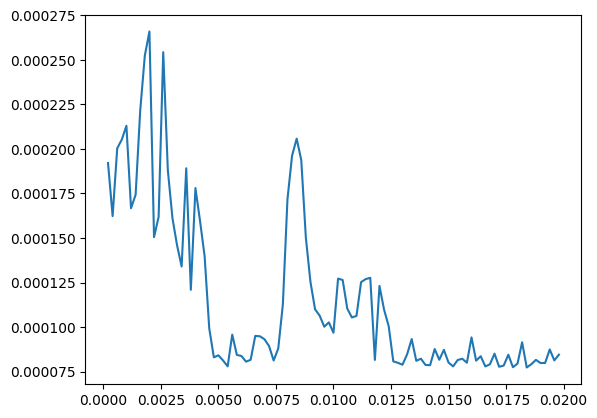

In [164]:
from scipy.optimize import newton ; import matplotlib.pyplot as plt
def derivada_f2(x):
    return 2*x+4

l_timings = []
l_dims = []
for i in range(1,100):
    dim = i/5000
    
    timings = %timeit -o -n 10 -r 5 -q newton(funcion2,x0=-6,fprime=derivada_f2,tol=dim)
    l_timings.append(timings.best) ; l_dims.append(dim)

#print(a_timings)
plt.plot(l_dims,l_timings)



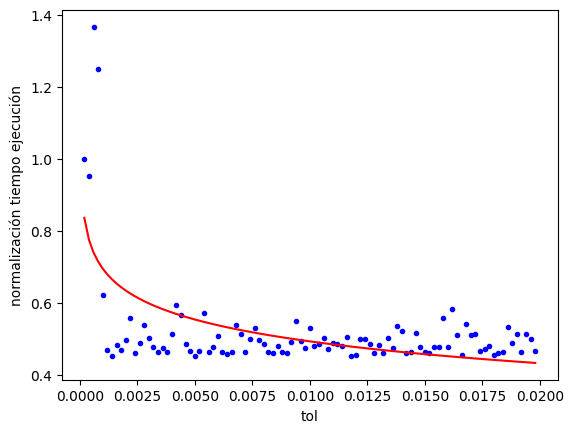

In [165]:
from scipy.optimize import newton ; from matplotlib import pyplot as plt
l_timings = []
for i in range(1,100):
    dim = i/5000
    
    timings = %timeit -o -n 10 -r 5 -q newton(funcion2,x0=-3,fprime=derivada_f2,tol=dim)
    l_timings.append([dim, timings.best])
a_timings = np.array(l_timings)

guardar_tiempos_ejecucion=[]
from scipy.optimize import curve_fit


def tofit(x, a, b):
    return a*np.log(x) + b
x = a_timings[: , 0]
y = a_timings[: , 1]
y = y / y[0] #normalizar timings
pars, _ = curve_fit(tofit, x, y)
plt.plot(x, y, 'b.',
x, tofit(x, pars[0], pars[1]), 'r-')
plt.xlabel('tol')
plt.ylabel('normalización tiempo ejecución')

tiempos_newton=(x, tofit(x, pars[0], pars[1]), 'c-')
guardar_tiempos_ejecucion.append(tiempos_newton)

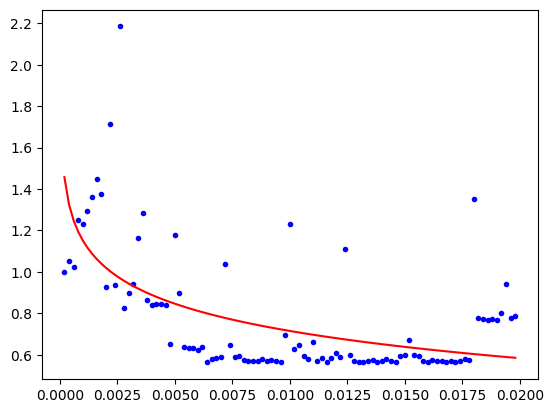

In [166]:

from scipy.optimize import root_scalar
l_timings = []
for i in range(1,100):
    dim = i/5000
    
    timings = %timeit -o -n 10 -r 5 -q root_scalar(funcion2,bracket=[-3,3],rtol=dim)
    l_timings.append([dim, timings.best])
a_timings = np.array(l_timings)


from scipy.optimize import curve_fit


def tofit(x, a, b):
    return a*np.log(x) + b
x = a_timings[: , 0]
y = a_timings[: , 1]
y = y / y[0] #normalizar timings
pars, _ = curve_fit(tofit, x, y)
plt.plot(x, y, 'b.',
x, tofit(x, pars[0], pars[1]), 'r-')
guardar_tiempos_ejecucion.append((x, tofit(x, pars[0], pars[1]), 'y-'))

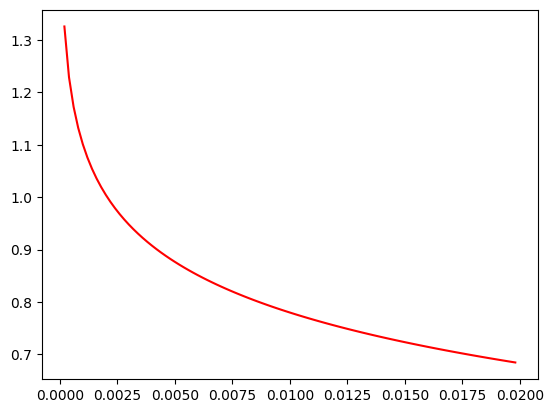

In [167]:

from scipy.optimize import fsolve
l_timings = []
for i in range(1,100):
    dim = i/5000
    
    timings = %timeit -o -n 10 -r 5 -q fsolve(funcion2,x0=-3,xtol=dim)
    l_timings.append([dim, timings.best])
a_timings = np.array(l_timings)


from scipy.optimize import curve_fit


def tofit(x, a, b):
    return a*np.log(x) + b
x = a_timings[: , 0]
y = a_timings[: , 1]
y = y / y[0] #normalizar timings

pars, _ = curve_fit(tofit, x, y)
plt.plot(  #b- para quitar los pts azules  #x, y, 'b-',
x, tofit(x, pars[0], pars[1]), 'r-')

guardar_tiempos_ejecucion.append((x, tofit(x, pars[0], pars[1]), 'r-'))


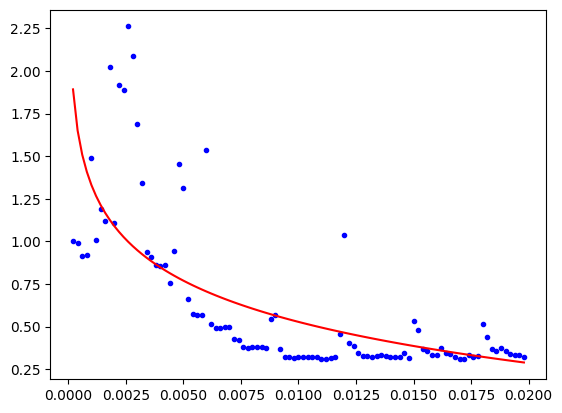

In [168]:

from scipy.optimize import brentq
l_timings = []
for i in range(1,100):
    dim = i/5000
    
    timings = %timeit -o -n 10 -r 5 -q brentq(funcion2,b=3,a=-3,xtol=dim)
    l_timings.append([dim, timings.best])
a_timings = np.array(l_timings)


from scipy.optimize import curve_fit


def tofit(x, a, b):
    return a*np.log(x) + b
x = a_timings[: , 0]
y = a_timings[: , 1]
y = y / y[0] #normalizar timings
pars, _ = curve_fit(tofit, x, y)
plt.plot(x, y, 'b.',
x, tofit(x, pars[0], pars[1]), 'r-')
#plt.ylabel('')

guardar_tiempos_ejecucion.append((x, tofit(x, pars[0], pars[1]), 'k-'))

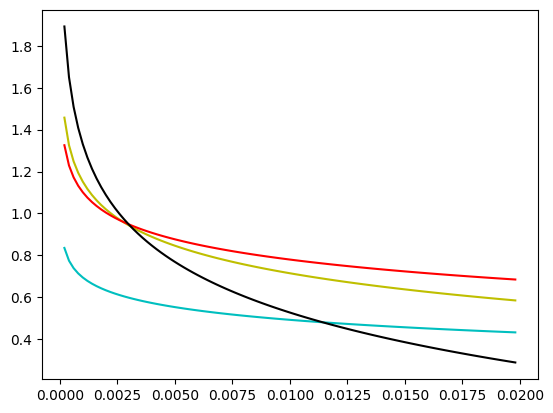

In [169]:

for grafica in guardar_tiempos_ejecucion:
    plt.plot(grafica[0],grafica[1],grafica[2])